In [38]:
import numpy as np
weights = np.zeros((11591, 2))
wt_file = open('features.category')

In [39]:
i = 0
for line in wt_file.readlines():
    line = line.strip().split(' ')
    j = 0
    for word in line:
        weights[i][j] = word
        j += 1
    i += 1
weights.shape

(11591, 2)

In [40]:
# sanity check
print(weights[0])
print(weights[900])
print(type(weights[0][1]))

[5.47605019e-40 1.61003028e-39]
[1.52851394e-39 1.61003028e-39]
<class 'numpy.float64'>


In [41]:
for i in range(11591):
    for j in range(2):
        weights[i][j] = weights[i][j] * (10 ** 37)

In [42]:
# kmeans clustering on weights
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, random_state = 0, init = 'k-means++', max_iter = 500, n_init = 1).fit(weights)
labels = kmeans.labels_
print(len(labels))

11591


In [43]:
import pandas as pd
data = pd.read_csv('category.csv')
text, label = [], []
for i in data.index:
    text.append(data['DESCRIPTION'][i])
    label.append(data['CATEGORY'][i])

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
label_ids = [0, 1, 2, 3, 4, 5] # 6 labels
text_j = [] # text_j[0] -- all texts for cluster 0 -- get tfidf to get top 10 features
labels_dict = [] # labels_dict[0] -- dictionary of counts for categories in cluster 0
for i in range(6):
    dict_ = defaultdict(int)
    text_ = []
    labels_dict.append(dict_)
    text_j.append(text_)
    
for i in range(len(labels)):
    for j in label_ids:
        if labels[i] == j:
            text_j[j].append(text[i])
            labels_dict[j][label[i]] += 1    

In [45]:
for i in range(6):
    print("Cluster Label: ", i)
    max_idx = max(labels_dict[i].values())
    for key, value in labels_dict[i].items():
        print(key, " --- ", value)
        if value == max_idx:
            print("***Max ^^^")
    print("\n")

Cluster Label:  0
Touching /Groping  ---  384
Commenting  ---  460
***Max ^^^
Others  ---  218
Rape / Sexual Assault  ---  268
Catcalls/Whistles  ---  431
Ogling/Facial Expressions/Staring  ---  353


Cluster Label:  1
Rape / Sexual Assault  ---  292
Catcalls/Whistles  ---  460
Commenting  ---  502
***Max ^^^
Touching /Groping  ---  397
Others  ---  233
Ogling/Facial Expressions/Staring  ---  334


Cluster Label:  2
Rape / Sexual Assault  ---  155
Others  ---  152
Commenting  ---  262
Touching /Groping  ---  207
Catcalls/Whistles  ---  287
***Max ^^^
Ogling/Facial Expressions/Staring  ---  201


Cluster Label:  3
Catcalls/Whistles  ---  584
Rape / Sexual Assault  ---  323
Others  ---  242
Commenting  ---  590
***Max ^^^
Touching /Groping  ---  512
Ogling/Facial Expressions/Staring  ---  378


Cluster Label:  4
Commenting  ---  390
***Max ^^^
Rape / Sexual Assault  ---  223
Others  ---  176
Touching /Groping  ---  283
Catcalls/Whistles  ---  364
Ogling/Facial Expressions/Staring  ---  2

0.019489034834075263 -0.019747322167019615
0.016100302783767846 -0.017530860360027763
11591


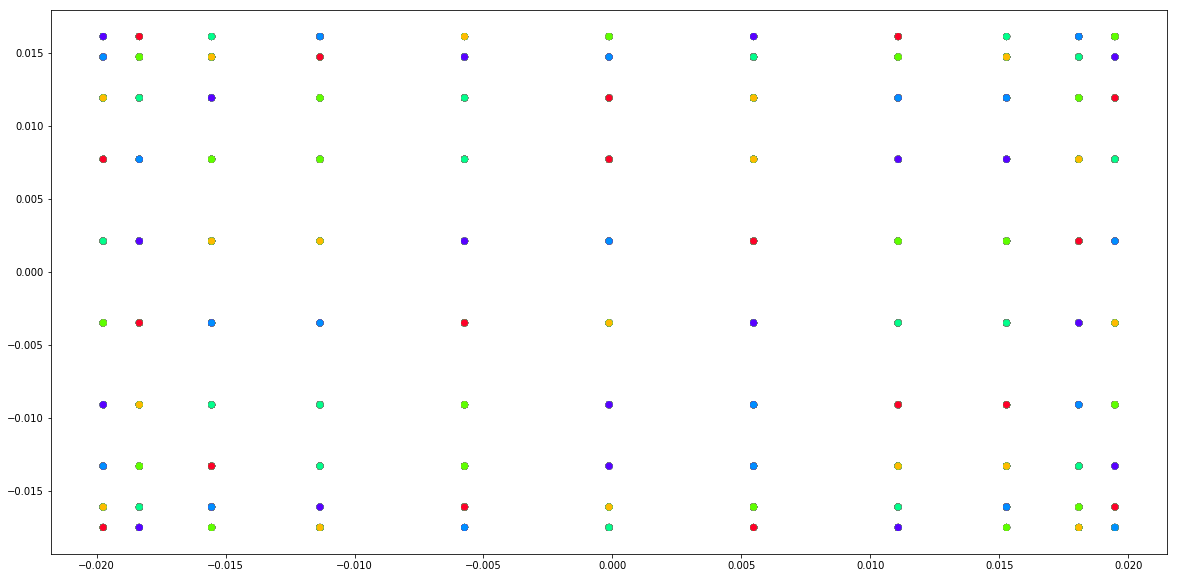

In [47]:
import matplotlib.pyplot as plt
NUM_COLORS = 6

cm = plt.get_cmap('gist_rainbow')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# for i in range(NUM_COLORS):
    # ax.plot(np.arange(10)*(i+1))
    
x_axis = [o[0] for o in weights]
y_axis = [o[1] for o in weights]

print(max(x_axis), min(x_axis))
print(max(y_axis), min(y_axis))
print(len(x_axis))

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xbound(lower = -0.01, upper = 0.01)
ax.set_ybound(lower = -0.01, upper = 0.01)

ax.scatter(x_axis, y_axis, c = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

In [42]:
!python category.py 

Commenting                           2576
Catcalls/Whistles                    2483
Touching /Groping                    2070
Ogling/Facial Expressions/Staring    1794
Rape / Sexual Assault                1468
Others                               1200
Name: CATEGORY, dtype: int64
